In [1]:
# import general classes for data processing
import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# import our custom classes
import sys
path_to_directory = '../'
if path_to_directory not in sys.path:
    sys.path.append(path_to_directory)
from model import Signal, GestureRecognitionModel
from model import GestureRecognitionDataset

# import SVM classes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.preprocessing import StandardScaler

# import MLP
from sklearn.neural_network import MLPClassifier

# import for loop and XGboost
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

# import model saving
import joblib

In [4]:
# deleted corrected xgboost, no additional accuracy

df = pd.read_csv('../data_rem.csv')

models = {"xgboost_c1":XGBClassifier(),
          "poly_c1": SVC(kernel="poly",degree = 2, C = 1),
          "poly_c10": SVC(kernel="poly",degree = 2, C = 10),
          "rbf_c1": SVC(kernel="rbf",degree = 2, C = 1),
          "rbf_c10": SVC(kernel="rbf",degree = 2, C = 10),
          "poly_c1_corr": SVC(kernel="poly",degree = 2, C = 1, class_weight='balanced'),
          "poly_c10_corr": SVC(kernel="poly",degree = 2, C = 10, class_weight='balanced'),
          "rbf_c1_corr": SVC(kernel="rbf",degree = 2, C = 1, class_weight='balanced'),
          "rbf_c10_corr": SVC(kernel="rbf",degree = 2, C = 10, class_weight='balanced'),
          }  

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

test_sets = [1, 2, 3]
subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")

results = {model:[] for model in models}

for subject in tqdm(subjects):
    for model in models:
        for test_set in test_sets:

            df2 = df[(df['subject'] == subject)]

            df_train = df2[(df2['take'] != test_set)]
            df_test = df2[(df2['take'] == test_set)]

            X_train = df_train[selected_columns]
            y_train = df_train['gesture']
            X_test = df_test[selected_columns]
            y_test = df_test['gesture']

            label_encoder = LabelEncoder()
            Y_encoded = label_encoder.fit_transform(y_train)
            y_train = Y_encoded 

            Y_encoded2 = label_encoder.fit_transform(y_test)
            y_test = Y_encoded2 

            models[model].fit(X_train, y_train)

            y_pred = models[model].predict(X_test)

            predictions = [round(value) for value in y_pred]
            predicted_labels_decoded = label_encoder.inverse_transform(predictions)

            acc = accuracy_score(y_test, predictions)*100
            
            results[model].append(acc)

results = pd.DataFrame(results)

  0%|          | 0/9 [00:00<?, ?it/s]

[Text(0, 0, 'xgboost_c1'),
 Text(1, 0, 'poly_c1'),
 Text(2, 0, 'poly_c10'),
 Text(3, 0, 'rbf_c1'),
 Text(4, 0, 'rbf_c10'),
 Text(5, 0, 'poly_c1_corr'),
 Text(6, 0, 'poly_c10_corr'),
 Text(7, 0, 'rbf_c1_corr'),
 Text(8, 0, 'rbf_c10_corr')]

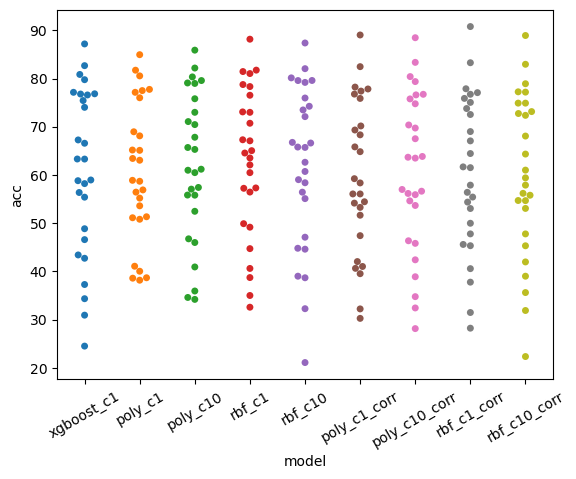

In [5]:
resultsplot = pd.DataFrame(results)
resultsplot = resultsplot.stack().reset_index()
resultsplot = resultsplot.rename(columns = {"level_1":"model", 0:"acc"})

ax = sns.swarmplot(data = resultsplot, x= "model", y = "acc" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)